<a href="https://colab.research.google.com/github/patrycjapiechowicz/Projects/blob/Predictive-Analytics/Intro_to_NN_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [ ]:
import tensorflow as tf

In [ ]:
tf.config.list_physical_devices()

2022-11-16 02:47:53.023807: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 02:47:53.032184: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 02:47:53.032625: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Intro to Keras

Keras is a deep-learning framework for Python that provides a convenient way to define and
train almost any kind of deep-learning model. Keras was initially developed for
researchers, with the aim of enabling fast experimentation.

Keras has the following key features:
* It allows the same code to run seamlessly on CPU or GPU.
* It has a user-friendly API that makes it easy to quickly prototype deep-learning models.
* It has built-in support for convolutional networks (for computer vision), recurrent networks (for sequence processing), and any combination of both.
* It supports arbitrary network architectures: multi-input or multi-output models, layer sharing, model sharing, and so on. This means.

Keras is appropriate for building essentially any deep-learning model, from a generative adversarial network
to a neural Turing machine.

Keras has well over 200,000 users, ranging from academic researchers and engineers
at both startups and large companies to graduate students and hobbyists. Keras
is used at Google, Netflix, Uber, CERN, Yelp, Square, and hundreds of startups working
on a wide range of problems. Keras is also a popular framework on Kaggle, the
machine-learning competition website, where almost every recent deep-learning competition
has been won using Keras models.


Keras handles the problem of building neural networks in a modular way  thus several different backend engines can
be plugged seamlessly into Keras. Currently, the three existing backend implementations
are:
* TensorFlow
* Theano 
* Microsoft Cognitive Toolkit (CNTK) backend.

### Multi-backend Keras and tf.keras:
* For Keras with the TensorFlow backend use tf.keras in TensorFlow 2.0 instead of keras library
* tf.keras is better maintained and has better integration with TensorFlow features 
* The latest release of Keras 2.3.0 makes significant API changes and add support for TensorFlow 2.0.
* 2.3.0 is the last major release of multi-backend Keras
* saving a model's weights, tf.keras defaults to the checkpoint format. Pass save_format='h5' to use HDF5 (or pass a filename that ends in .h5).

### Why Keras?
* With TensorFlow 2.0, the Keras API can accomplish many of these same tasks as high level API - Estimators
* Keras is believed to be an easier API to learn
* User friendly - offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear and actionable feedback upon user error.
* Modular - A model is understood as a sequence or a graph of standalone, fully configurable modules that can be plugged together with as few restrictions as possible. 
* Easily extensibile - New modules are simple to add as new classes and functions, 
* Fast integration - started as separated project, fully integrated in Tensorflow 2.0 

####  Keras workflow

1. Define and preprocess training data: input tensors and target tensors.
2. Define input layers/model that maps your inputs to your targets
3. Setup loss function, an optimizer, and some metrics to monitor appropriate to the problem
4. Iterate on your training data by calling the fit() method of your model.

#### 1. Define and preprocess data
* Input tensors
* Label/target tensors

#### Diamond Datset
* price in US dollars (\\$326--\$18,823)

* carat weight of the diamond (0.2--5.01)

* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* color diamond colour, from J (worst) to D (best)

* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* x length in mm (0--10.74)

* y width in mm (0--58.9)

* z depth in mm (0--31.8)

* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* table width of top of diamond relative to widest point (43--95)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# %load "g:/My Drive/diamonds_preproc.py"
import numpy as np        
import pandas as pd       
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv("../TM2/data/diamonds.csv")
df.drop(columns= "Unnamed: 0",inplace = True)

# Train/test split

from sklearn.model_selection import train_test_split
X = df.drop(columns = "price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. select labels of features for one hot encoding and standarization
num_labels = X_train.select_dtypes("number").columns
cat_labels = X_train.select_dtypes("object").columns

# 2. define preprocessor for each type of data
cat_preprocessor = OneHotEncoder(drop = "if_binary")
num_preprocessor = RobustScaler()

# 3. Combine it all together
preprocessor = ColumnTransformer([("cat", cat_preprocessor, cat_labels),
                                 ("num", num_preprocessor, num_labels)])

# Relevant to construct labels for all features
preprocessor.fit(X_train)

feature_labels = preprocessor.transformers_[0][1].get_feature_names_out(cat_labels).tolist()
feature_labels.extend(num_labels)

from sklearn.metrics import mean_squared_error

X_train_preproc = preprocessor.transform(X_train)
X_test_preproc = preprocessor.transform(X_test)


#### 2. Defining layers in keras
There are two ways to define a model: 
* Sequential class (only for linear stacks of layers)

To build a simple, fully-connected network (i.e. multi-layer perceptron):
```
from tf.keras import models
from tf.keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))%
```
* functional API - with this API you’re manipulating the data tensors that the model processes and applying layers to this tensor as if they were functions.

```
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)
```

#### Layers configuration
tf.keras.layers provides many different layers.specified by the name of a built-in function or as a callable object:
* built-in function

`layers.Dense(64, activation='sigmoid')`

* callable object

`layers.Dense(64, activation=tf.keras.activations.sigmoid)`


#### Commonly used and shared arguments:  
* activation: Set the activation function for the layer, specified by the name of a built-in function or as a callable object, by default, no activation is applied.

`tf.keras.activations.`

* kernel_initializer and bias_initializer: The initialization schemes that create the layer's weights, defaults  "Glorot uniform" initializer.

`tf.keras.initializers.`

* kernel_regularizer and bias_regularizer: The regularization schemes that apply the layer's weights, such as L1 or L2 regularization, by default, no regularization is applied.

`tf.keras.regularizers.`

### Functional API in Keras - complex models
* Sequential approach is a simple stack of layers that cannot represent arbitrary models
* For more complex model topologies use the Keras functional API
* When to use functional API?:
    * Multi-input models
    * Multi-output models
    * Models with shared layers (same layer called several times
    * Models with non-sequential data flows (e.g. residual connections)


#### How it works?
1. A layer instance is callable and returns a tensor. This tensor is then fed as argument to the next layer
2. Input tensors and output tensors are used to define a tf.keras.Model instance
3. Model is trained just like the Sequential model.

`
inputs = tf.keras.Input(shape=(32,))  # Returns an input placeholder
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
predictions = layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data, labels, batch_size=32, epochs=5)
`

In [ ]:
def model_init():
    input_layer = layers.Input(shape = (X_train_preproc.shape[1]),name = "input")

    hidden_layer_1 = layers.Dense(32, activation="relu",name = "h1")(input_layer)

    hidden_layer_2 = layers.Dense(32, activation="relu",name = "h2")(hidden_layer_1)

    output_layer = layers.Dense(1, activation="relu",name = "output")(hidden_layer_2)

    model = keras.Model(input_layer, output_layer)

    model.compile(loss = "mse", optimizer = "adam", metrics=["mape"])
    
    return model

In [ ]:
model = model_init()

2022-11-16 02:47:59.674826: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-16 02:47:59.675790: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 02:47:59.676331: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 02:47:59.676697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so retur

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 26)]              0         
                                                                 
 h1 (Dense)                  (None, 32)                864       
                                                                 
 h2 (Dense)                  (None, 32)                1056      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 1,953
Trainable params: 1,953
Non-trainable params: 0
_________________________________________________________________


In [ ]:
26*32+32

864

#### 3. Defining Learning process(compilation)
In the learning process you specify the optimizer and loss function(s) that the model should use, as well as the metrics you
want to monitor during training:

* optimizer: This object specifies the training procedure. Pass optimizer instances from tf.keras.optimizers module, such as tf.keras.optimizers.Adam. Optimizers with default parameters can also be passed via strings, such as 'adam' or 'sgd'.

`tf.keras.optimizers`


* loss: The function to minimize during optimization. Common choices includes mse, categorical_crossentropy, and binary_crossentropy, specified by name or by a callable object from the tf.keras.losses module

`tf.keras.losses`

* metrics: Used to monitor training. Passed as strings or callables from the tf.keras.metrics module.

`tf.keras.metrics`

* Example
```
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='mse',
metrics=['accuracy'])
```

#### 4. Fitting model on data
* small datasets - use in-memory NumPy arrays to train and evaluate a model. The model is "fit" to the training data using the fit method:
```
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)
```

* large datasets - use the Datasets API to scale or use multi-device training. 

`
dataset = tf.data.Dataset.from_tensor_slices((data, labels))
dataset = dataset.batch(32)
model.fit(dataset, epochs=10)`


#### Important arguments:
* epochs: An epoch is one iteration over the entire input data 
* batch_size: In case of NumPy arrays the model slices the data into smaller batches and iterates over these batches during training. 
* validation_data: When prototyping a model, you want to easily monitor its performance on some validation data. Passing this argument—a tuple of inputs and labels—allows the model to display the loss and metrics in inference mode for the passed data, at the end of each epoch.




In [ ]:
model = model_init()

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 26)]              0         
                                                                 
 h1 (Dense)                  (None, 32)                864       
                                                                 
 h2 (Dense)                  (None, 32)                1056      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 1,953
Trainable params: 1,953
Non-trainable params: 0
_________________________________________________________________


In [ ]:
32*32+32


1056

In [ ]:
26*32+32

864

In [ ]:
X_train_preproc.shape[0]*.8/128

235.9875

In [ ]:
history = model.fit(X_train_preproc,
                   y_train,
                   batch_size = 1024,
                   epochs = 10,
                   validation_split=.2)

Epoch 1/10
30/30 [==============================] - 0s 6ms/step - loss: 1153821.7500 - mape: 22.5590 - val_loss: 941516.9375 - val_mape: 22.0764
Epoch 2/10
30/30 [==============================] - 0s 5ms/step - loss: 1146397.6250 - mape: 22.1666 - val_loss: 934390.3125 - val_mape: 21.6772
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 1138938.1250 - mape: 21.7938 - val_loss: 926405.8125 - val_mape: 21.3004
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 1131747.7500 - mape: 21.4295 - val_loss: 918271.8125 - val_mape: 20.9465
Epoch 5/10
30/30 [==============================] - 0s 3ms/step - loss: 1124680.2500 - mape: 21.0911 - val_loss: 912627.3750 - val_mape: 20.5710
Epoch 6/10
30/30 [==============================] - 0s 4ms/step - loss: 1117812.3750 - mape: 20.7560 - val_loss: 904499.4375 - val_mape: 20.2520
Epoch 7/10
30/30 [==============================] - 0s 3ms/step - loss: 1110934.0000 - mape: 20.4490 - val_loss: 897676.8750 - val

#### 5. Evaluate and predict
* Evaluate method: `tf.keras.Model.evaluate` 
* Predict method: `tf.keras.Model.predict`
* Both methods use NumPy data and a tf.data.Dataset

`model.evaluate(data, labels, batch_size=32)`


In [ ]:
model.evaluate(X_test_preproc,y_test)

506/506 [==============================] - 1s 2ms/step - loss: 1405421.6250 - mape: 36.0133


[1405421.625, 36.01332092285156]

In [ ]:
y_test_pred = model.predict(X_test_preproc)

506/506 [==============================] - 1s 1ms/step


In [ ]:
mean_squared_error(y_test,y_test_pred,squared=False)

1185.5047892320208

### Callbacks
* A callback allows to customize and extend model behavior during training 
* Keras allows you to write your own custom callback 
* There are several predefined callbacks located in tf.keras.callbacks that include:
    * ModelCheckpoint: save checkpoints of your model at regular intervals
    * LearningRateScheduler: Dynamically change the learning rate
    * EarlyStopping: Interrupt training when validation performance has stopped improving
    * TensorBoard: Monitor the model's behavior using TensorBoard

`
callbacks = [
  tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
  ]
model.fit(data, labels, batch_size=32, epochs=5, callbacks=callbacks,
          validation_data=(val_data, val_labels))
`


In [ ]:
def model_init():
    input_layer = layers.Input(shape = (X_train_preproc.shape[1]),name = "input")

    hidden_layer = layers.Dense(64, activation="relu",name = "h1")(input_layer)

    hidden_layer = layers.Dense(64, activation="relu",name = "h2")(hidden_layer)

    output_layer = layers.Dense(1, activation="relu",name = "output")(hidden_layer)

    model = keras.Model(input_layer, output_layer)

    model.compile(loss = "mse", optimizer = "adam", metrics=["mape"])
    
    return model

In [ ]:
import datetime
logs_path = "logs/"+datetime.datetime.now().strftime("%H-%M-%S")

callbacks = [
  keras.callbacks.EarlyStopping(patience=20, monitor='val_loss',restore_best_weights=True),
  keras.callbacks.TensorBoard(log_dir=logs_path)
  ]

model = model_init()

history = model.fit(X_train_preproc,
                   y_train,
                   batch_size = 1024,
                   epochs = 2000,
                   validation_split=.2,
                    verbose = 0,
                   callbacks = callbacks)


In [ ]:
%pwd

'C:\\Users\\paperspace\\Desktop\\Tomek trainer\\12. Neural Networks'

In [ ]:
y_test_pred = model.predict(X_test_preproc)

506/506 [==============================] - 1s 1ms/step


In [ ]:
mean_squared_error(y_test,y_test_pred,squared=False)

553.4178862407822

In [ ]:
%pwd

'/home/paperspace/Desktop/TM3'

tensorboard --logdir "/home/paperspace/Desktop/TM3/logs" --host localhost --port 8088

### Saving and restoring model
* by default tensorflow save data in TensorFlow checkpoint file format
* to save in  Keras HDF5 format use .h5 extension

Keras allows for different behaviour on save :
* the weights values - tf.keras.Model.save_weights, 

`
model.save_weights('./weights/my_model')
model.load_weights('./weights/my_model') # the same model architecture`

`
model.save_weights('my_model.h5', save_format='h5')
model.load_weights('my_model.h5')
`

* the model configuration - serializes the model architecture without any weights, supported formats are JSON and YAML:

`
json_string = model.to_json()
json_string
`

`
import json
import pprint
pprint.pprint(json.loads(json_string))
`

`
new_model = tf.keras.models.model_from_json(json_string) # recreate model
`

`
yaml_string = model.to_yaml()
print(yaml_string)
`

`
new_model = tf.keras.models.model_from_yaml(yaml_string) # recreate from yaml
`

* entire model in one file - the weight values, the model's configuration, and the optimizer's configuration, allows to checkpoint a model and resume training later—from the exact same state—without access to the original code

`
model.save('my_model.h5')
`

`
model = tf.keras.models.load_model('my_model.h5')
`


-------


## Advanced techniques related to training neural networks
* Weight initialization
* Activation functions
* Optimizers
* Batch normalization
* Dropout(regularization)

### Weight Initialization
Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree

* tf.keras.initializers module offers built-in initializers such as:
    * RandomNormal - generates tensors with a normal distribution
    * RandomUniform - generates tensors with a uniform distribution
    * TruncatedNormal - generates tensors like RandomNormal but values more than two standard deviations from the mean are discarded and re-drawn 
    * Zeros - generates tensors initialized to 0
    * Ones - generates tensors initialized to 1
    * GlorotNormal - generate tensors from truncated normal distribution centered on 0 with $$stddev = \sqrt{\frac{2}{fan_{in} + fan_{out}}}$$ where $fan_{in}$ is the number of input units in the weight tensor and $fan_{out}$ is the number of output units in the weight tensor. http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf
    * GlorotUniform - generates tensors from a uniform distribution within $[-cap, cap]$, where $$cap = \sqrt{\frac{6}{fan_{in} + fan_{out}}}$$
    * VarianceScaling - generate tensors with scale adjusted  to the shape of weights tensor
    

More initializers: https://keras.io/initializers/

In [ ]:
from tensorflow.keras.initializers import RandomNormal, RandomUniform,TruncatedNormal,Ones,GlorotNormal,GlorotUniform,VarianceScaling
n=10000

classes = [RandomNormal, RandomUniform,TruncatedNormal,GlorotNormal,GlorotUniform, VarianceScaling]  # list of functions
output=np.empty(shape=(n,len(classes)))

for idx,fn in enumerate(classes):
    initializer=fn(seed=42)
    output[:,idx] = np.ravel(initializer(shape=(n,1)))
       

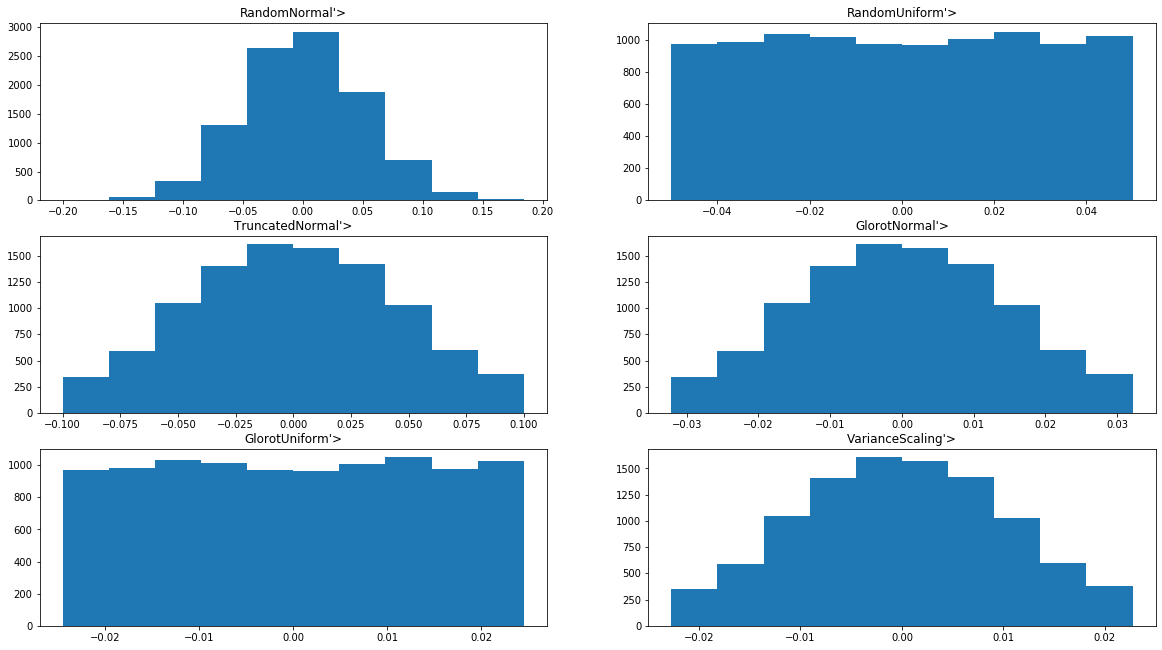

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,15


for i in range(0, 6):
    plt.subplot(4, 2, i+1).set_title(str(classes[i]).split(".")[-1])
    plt.hist(output[:,i])



-----

### Activation Functions
Sigmoid functions suffer from gradient vanishing problem, making training slower

There are many choices apart from sigmoid and tanh; 
* 'relu' (rectified linear unit) 
* 'selu' (scaled exponential linear unit)
* 'elu' 
* 'exponential' 
* 'sigmoid' 
* 'softmax' 
* 'softplus' 
* 'tanh' 

https://keras.io/api/layers/activations/

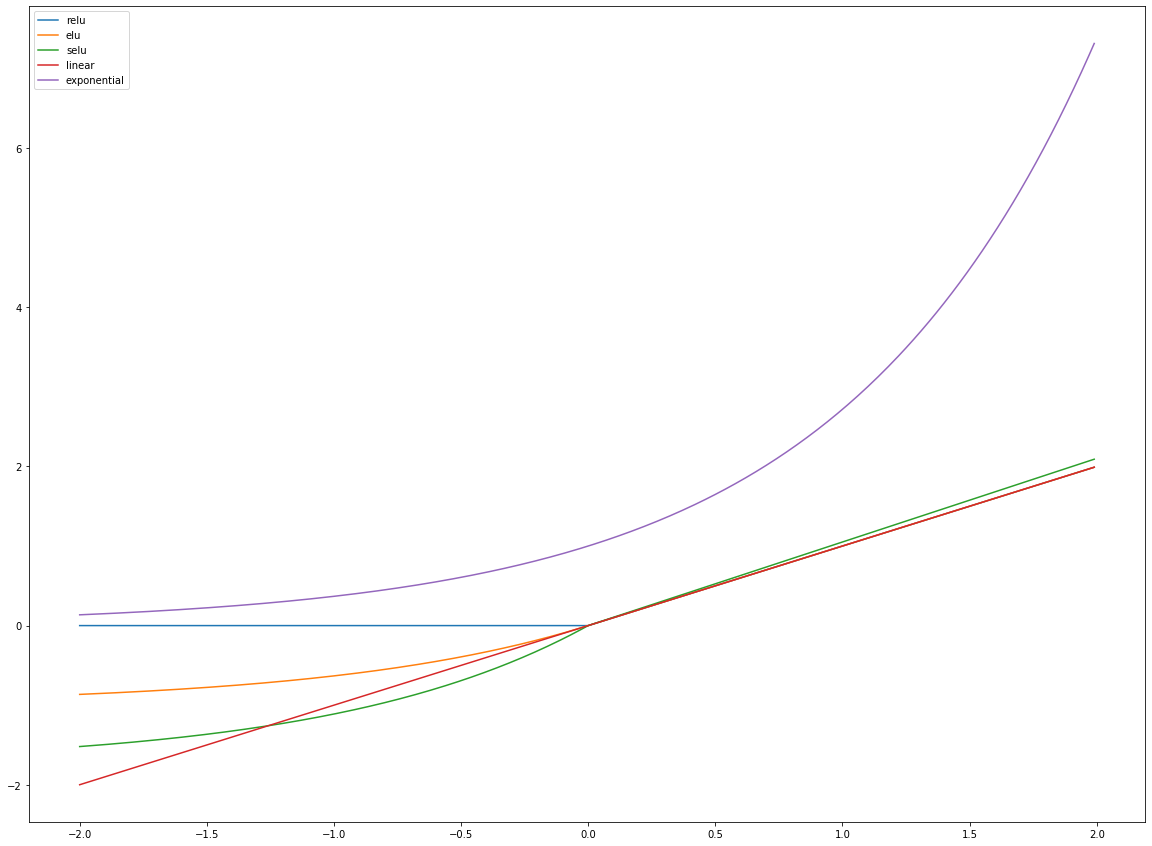

In [ ]:
from tensorflow.keras.activations import relu,elu,selu,sigmoid,tanh, linear, exponential, softmax
wartosci = np.arange(-2, 2, 0.01)
classes = [relu,elu,selu, linear,exponential]  # list of functions
output=np.empty(shape=(len(wartosci),len(classes)))

for idx,fn in enumerate(classes):
    output[:,idx]=np.ravel(fn(wartosci))

from pylab import rcParams
rcParams['figure.figsize'] = 20,15

legenda= [str(i).split(" ")[1] for i in classes]
plt.plot(wartosci,output)
plt.legend(legenda)


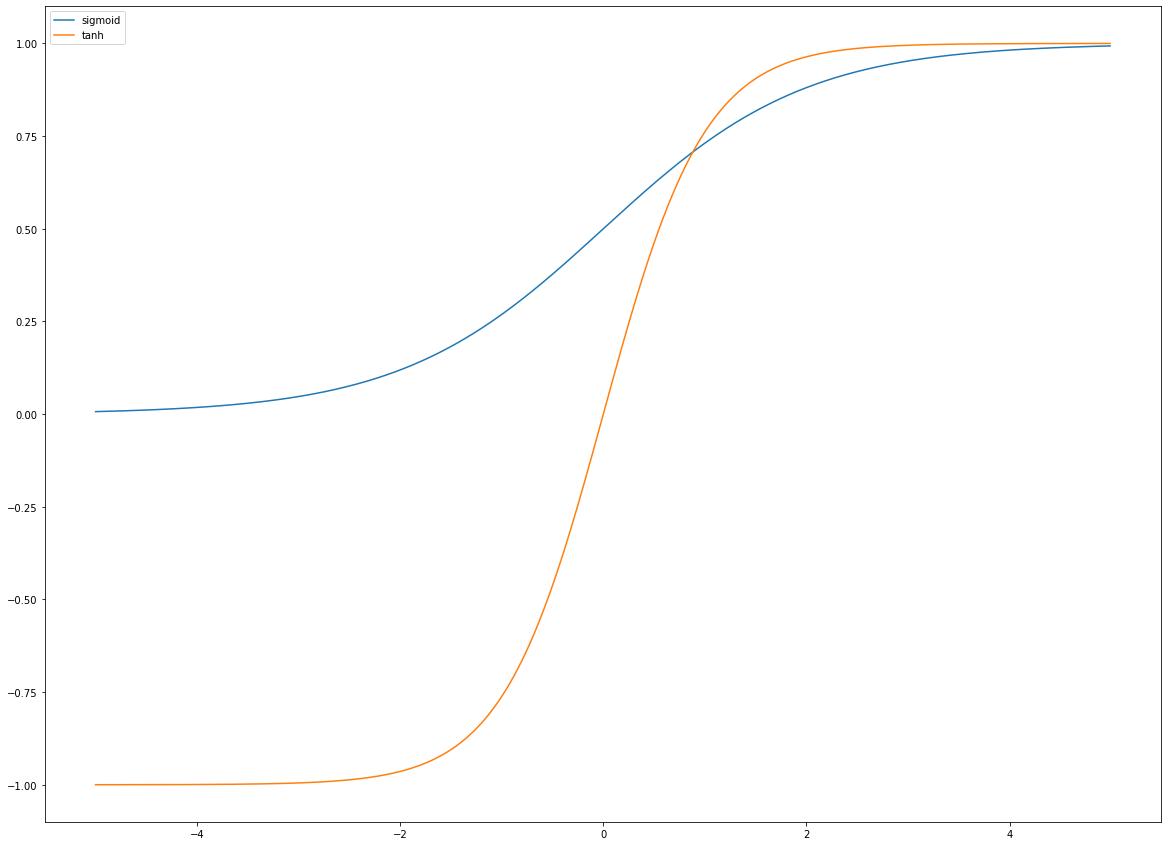

In [ ]:
from tensorflow.keras.activations import relu,elu,selu,sigmoid,tanh, linear, exponential, softmax
wartosci = np.arange(-5, 5, 0.01)
classes = [sigmoid, tanh]  # list of functions
output=np.empty(shape=(len(wartosci),len(classes)))

for idx,fn in enumerate(classes):
    output[:,idx]=np.ravel(fn(wartosci))

from pylab import rcParams
rcParams['figure.figsize'] = 20,15

legenda= [str(i).split(" ")[1] for i in classes]
plt.plot(wartosci,output)
plt.legend(legenda)

### Optimizers

Many variants of SGD are available and employed in training
One of the most popular ones are Adam (Adaptive Moment Estimation)
Doc: https://keras.io/optimizers/

![Source](graphics/optimizers.gif)


### Batch Normalization
Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

Normalize each mini-batch before nonlinearity


### Dropout 
Dropout is one of powerful ways to prevent overfitting. The idea is simple. It is disconnecting some (randomly selected) neurons in each layer.

The probability of each neuron to be disconnected, namely 'Dropout rate', has to be designated

Doc: https://keras.io/layers/core/#dropout

![Source](graphics/dropout.png)
